1. pandas & seaborn uses

2. https://github.com/mwaskom/seaborn-data >>> <strong>'titanic.csv'</strong>

3. Exploratory Data Analysis <strong>(EDA)</strong>

4. submit >>> 2hours later <strong>(17:00)</strong>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

# EDA

## Read Data

In [2]:
titanic = pd.read_csv('dataset/titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.shape

(891, 15)

## Missing Value Check

In [4]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# isnull().sum() / 891 --> null data percent
# deck column 77%

titanic.isnull().sum() / len(titanic) 

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [6]:
# 너무 많은 null값, deck column 삭제

titanic.drop("deck", axis=1, inplace=True)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [7]:
titanic.shape

(891, 14)

In [8]:
titanic['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

## Summary

In [9]:
# 생존자 수 : 342

titanic["survived"].value_counts().to_frame()

,survived
0,549
1,342


In [10]:
# 성별 생존자 수 확인

titanic.groupby("sex")["survived"].sum().to_frame()

,survived
sex,
female,233
male,109


In [11]:
# 성별 전체 인원

titanic['sex'].value_counts().to_frame()

,sex
male,577
female,314


In [12]:
# 생존여성 / 여성 전체인원 => 74%
# 생존남성 / 남성 전체인원 => 19%

surv_rate = (titanic.groupby("sex")["survived"].sum() / titanic['sex'].value_counts()) * 100
pd.DataFrame(surv_rate, columns=['survival rate (%)']).reset_index()

,index,survival rate (%)
0,female,74.203822
1,male,18.890815


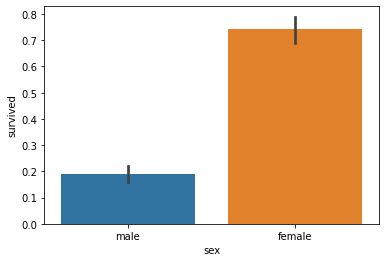

In [13]:
# female    74.203822%
# male      18.890815%

per = sns.barplot(x='sex',y='survived',data=titanic)

In [14]:
# 출처 : https://www.kaggle.com/karthickaravindan/titanic-simple-bar-chart

sns.set_style(style="whitegrid")

def bar_chart(feature):
    alive = titanic[titanic['survived']==1][feature].value_counts()
    dead = titanic[titanic['survived']==0][feature].value_counts()
    df = pd.DataFrame([alive, dead])
    df.index=['alive','dead']
    df.plot(kind='bar',stacked=True,fig=(18,6),title=feature)
    
alive = titanic[titanic['survived']==1]['sex'].value_counts()
dead = titanic[titanic['survived']==0]['sex'].value_counts()

test = pd.DataFrame([alive, dead])
test

,female,male
sex,233,109
sex,81,468


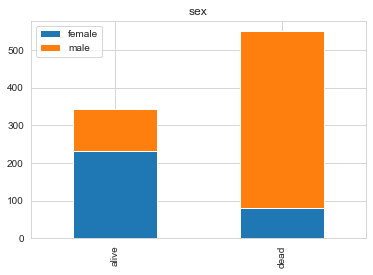

In [15]:
bar_chart('sex')

In [16]:
# who, sex별 생존자 수 확인

titanic.groupby(["who","sex"])["survived"].sum().to_frame()

survived
who   sex             
child female        28
      male          21
man   male          88
woman female       205

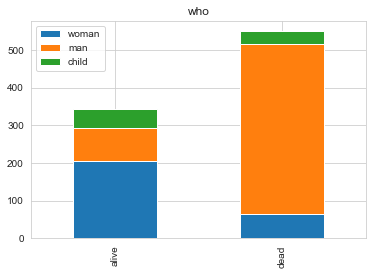

In [17]:
bar_chart('who')

In [18]:
# embark_town이 NaN인 2명은 counting이 안됨.
# total value = 889

titanic.groupby('survived')['embark_town'].value_counts().to_frame()

embark_town
survived embark_town             
0        Southampton          427
         Cherbourg             75
         Queenstown            47
1        Southampton          217
         Cherbourg             93
         Queenstown            30

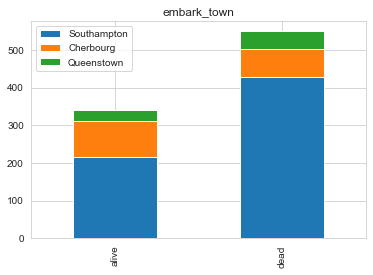

In [19]:
bar_chart("embark_town")

In [20]:
min_age = titanic["age"] == titanic["age"].min()
max_age = titanic["age"] == titanic["age"].max()

titanic[min_age | max_age]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
630,1,1,male,80.00,0,0,30.0000,S,First,man,True,Southampton,yes,True
803,1,3,male,0.42,0,1,8.5167,C,Third,child,False,Cherbourg,yes,False


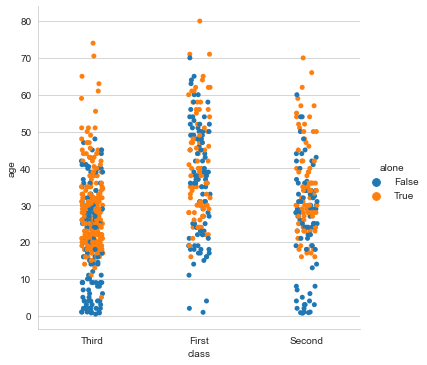

In [21]:
sns.catplot(data=titanic, x="class", y="age", hue="alone");

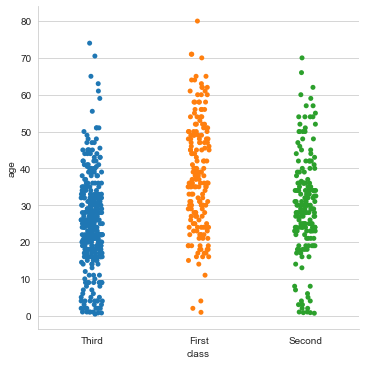

In [22]:
sns.catplot(data=titanic, x="class", y="age", );

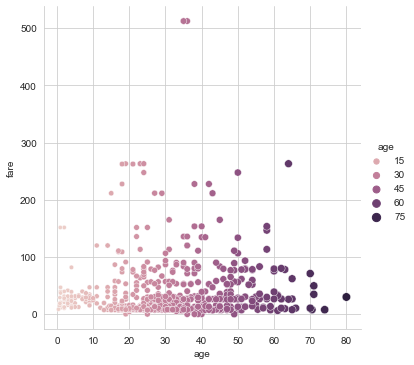

In [23]:
# 나이와 요금의 관계 어릴수록 싸다

sns.relplot(data=titanic, x='age', y='fare', hue='age', size='age');

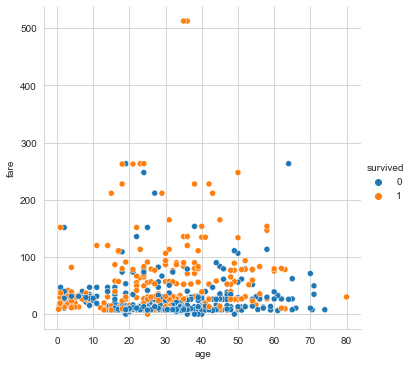

In [24]:
# 나이와 요금과 생존여부 관계

sns.relplot(data=titanic, x='age', y='fare', hue='survived');

In [25]:
# *.groupby로 확인된 객실등급별 생존자 수 재확인

c = titanic['who'] == 'child'
s = titanic['survived'] == 1

titanic[c & s].sort_values(by='pclass', ascending=True).head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
689,1,1,female,15.00,0,1,211.3375,S,First,child,False,Southampton,yes,False
445,1,1,male,4.00,0,2,81.8583,S,First,child,False,Southampton,yes,False
435,1,1,female,14.00,1,2,120.0000,S,First,child,False,Southampton,yes,False
802,1,1,male,11.00,1,2,120.0000,S,First,child,False,Southampton,yes,False
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,Southampton,yes,False


In [26]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [27]:
test = titanic.loc[:, ['survived', 'alive']]
test2 = titanic.loc[:, ['pclass', 'class']]

for i in range(len(test)):
    print(titanic['survived'][i], titanic['alive'][i])

# for i in range(len(test)):
#     print(titanic['pclass'][i], titanic['class'][i])

0 no
1 yes
1 yes
1 yes
0 no
0 no
0 no
0 no
1 yes
1 yes
1 yes
1 yes
0 no
0 no
0 no
1 yes
0 no
1 yes
0 no
1 yes
0 no
1 yes
1 yes
1 yes
0 no
1 yes
0 no
0 no
1 yes
0 no
0 no
1 yes
1 yes
0 no
0 no
0 no
1 yes
0 no
0 no
1 yes
0 no
0 no
0 no
1 yes
1 yes
0 no
0 no
1 yes
0 no
0 no
0 no
0 no
1 yes
1 yes
0 no
1 yes
1 yes
0 no
1 yes
0 no
0 no
1 yes
0 no
0 no
0 no
1 yes
1 yes
0 no
1 yes
0 no
0 no
0 no
0 no
0 no
1 yes
0 no
0 no
0 no
1 yes
1 yes
0 no
1 yes
1 yes
0 no
1 yes
1 yes
0 no
0 no
1 yes
0 no
0 no
0 no
0 no
0 no
0 no
0 no
0 no
1 yes
1 yes
0 no
0 no
0 no
0 no
0 no
0 no
0 no
1 yes
1 yes
0 no
1 yes
0 no
0 no
0 no
0 no
0 no
0 no
0 no
0 no
0 no
0 no
0 no
0 no
0 no
1 yes
0 no
1 yes
0 no
1 yes
1 yes
0 no
0 no
0 no
0 no
1 yes
0 no
0 no
1 yes
0 no
0 no
0 no
0 no
1 yes
1 yes
0 no
0 no
0 no
1 yes
0 no
0 no
0 no
0 no
1 yes
0 no
0 no
0 no
0 no
1 yes
0 no
0 no
0 no
0 no
1 yes
0 no
0 no
0 no
1 yes
1 yes
0 no
0 no
0 no
0 no
0 no
1 yes
0 no
0 no
0 no
0 no
0 no
0 no
0 no
0 no
0 no
0 no
1 yes
1 yes
0 no
1 yes
1 y

In [28]:
# 중복데이터 제거

del titanic['alive']
del titanic['pclass']

In [29]:
# sibsp : 함께 탑승한 형제 또는 배우자 수
# parch : 함께 탑승한 부모 또는 자녀 수

# num of families

titanic['family'] = 1 + titanic['sibsp'] + titanic['parch']
titanic.columns # 'family'

Index(['survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class',
       'who', 'adult_male', 'embark_town', 'alone', 'family'],
      dtype='object')

In [30]:
surv = titanic['survived'] == 1
alon = titanic['alone'] == True

alon_surv = titanic[surv & alon]
alon_surv.groupby(['sex', 'who',])['survived'].sum().to_frame()

survived
sex    who            
female child         4
       woman        95
male   man          64

In [31]:
titanic.groupby(['alone'])['survived'].value_counts().to_frame()

survived
alone survived          
False 1              179
      0              175
True  0              374
      1              163

354
537


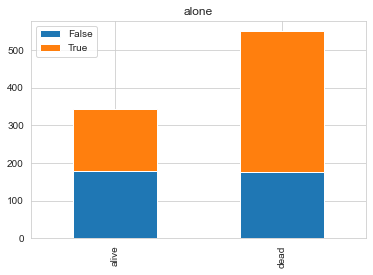

In [32]:
print(titanic[titanic['family'] != 1].shape[0]) # 가족과 함께 온 탑승객
print(titanic[titanic['family'] == 1].shape[0]) # 혼자 온 탑승객
bar_chart('alone')

354
537


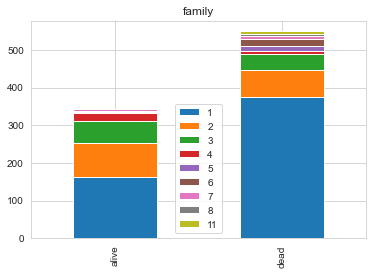

In [33]:
# 생존자 중, 혼자 온 사람의 생존율이 가장 높음

print(titanic[titanic['family'] != 1].shape[0]) # 가족과 함께 온 탑승객
print(titanic[titanic['family'] == 1].shape[0]) # 혼자 온 탑승객
bar_chart('family')

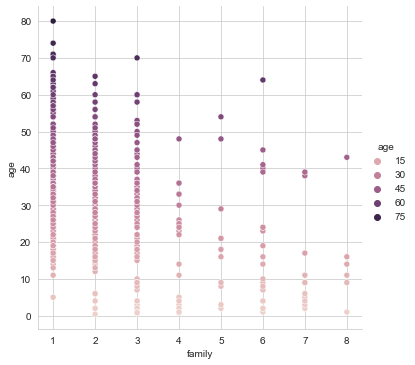

In [34]:
sns.relplot(data=titanic, x='family', y='age', hue='age');

In [35]:
titanic.groupby('class')['embark_town'].count().to_frame()

,embark_town
class,
First,214
Second,184
Third,491


In [36]:
titanic

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone,family
0,0,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,False,2
1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,False,2
2,1,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,True,1
3,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,False,2
4,0,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,True,1
887,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,True,1
888,0,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,False,4
889,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,True,1


In [60]:
titanic['embarked'].dropna(axis=0, how='any', inplace=True)
titanic['embark_town'].dropna(axis=0, how='any', inplace=True)

In [61]:
i1 = titanic['embarked'] == np.nan
i2 = titanic['embark_town'] == np.nan
titanic[i1 | i2]

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone,family


In [62]:
titanic['embarked'].isnull().sum()

2

In [65]:
titanic['embarked'].isnull().sum()

2